ERROR! Session/line number was not unique in database. History logging moved to new session 47


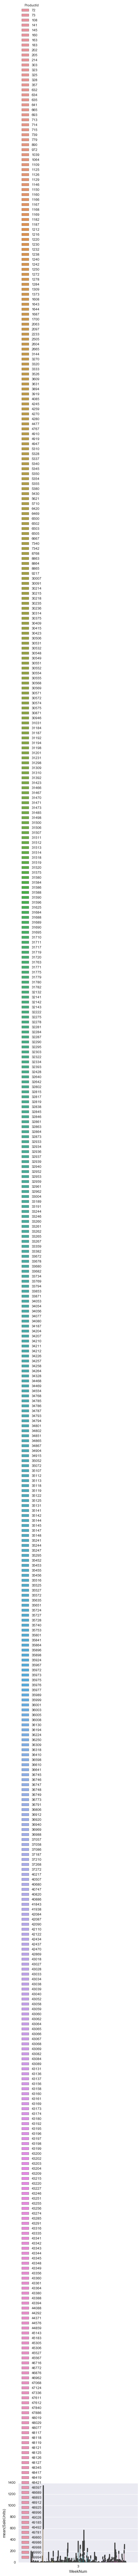

In [13]:
import pandas as pd
from sklearn.grid_search import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
import numpy as np
from sklearn.cross_validation import cross_val_score
import matplotlib
import seaborn as sb

%matplotlib inline

table_split = {'sales_prd': ['Semana','Agencia_ID','Canal_ID','Ruta_SAK','Cliente_ID','Producto_ID'],
              'sales_rtn':['Semana','Venta_uni_hoy','Venta_hoy','Dev_uni_proxima','Dev_proxima', 'Demanda_uni_equil']}


store = pd.HDFStore('../data/mystore.h5') 
model = LinearRegression()
for tempdf in store.select_as_multiple(['sales_prd','sales_rtn'], chunksize = 1000000):
    df = tempdf.ix[:,1:]
    df = df.rename(columns = {'Semana':'WeekNum','Venta_uni_hoy':'SaleUnits','Venta_hoy':'SaleNum',\
                'Dev_uni_proxima':'ReturnUnits','Dev_proxima':'ReturnNum', 'Demanda_uni_equil':'Demand',\
                             'Agencia_ID':'SalesDepotId','Canal_ID':'SalesChannelId','Ruta_SAK':'RouteId','Cliente_ID':'ClientId',\
                             'Producto_ID':'ProductId'})
    sb.barplot(x = 'WeekNum', y = 'SaleUnits', hue='ProductId', data = df)
    #saletrain, saletest, saleLabelTrain, saleLabelTest = train_test_split(df, df['SaleUnits'], test_size = 0.4)    
    #%time print(np.sqrt(-cross_val_score(model, saletrain, saleLabelTrain, cv=10, scoring='mean_squared_error')).mean())
    break

    


# create a store
#for iterator in pd.read_csv('data/train.csv', iterator = True, chunksize = 20000):
    #store.append_to_multiple(table_split, iterator, selector = 'sales_rtn')


    
